# Gausova Kvadratura a Legendrovy polynomy

imports:

In [44]:
import karhunenLoeve as kl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np
import time


# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [83]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
real_integ_value = fI(1)-fI(-1)
Gq = kl.integ.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.6666666666666639
actual value of integral: 0.6666666666666666
error: 2.7755575615628914e-15


over interval (a,b)

In [85]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
real_integ_value = fI(b)-fI(a)
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: 8.659739592076221e-15


##### testing orthonormality of polynomials

In [88]:
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal(x, 50)[n]*kl.integ.legendre_normal(x, 50)[n]
real_integ_value = 1
Gq = kl.integ.quadrature(f, matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.999999999999995
actual value of integral: 1
error: 4.9960036108132044e-15


In [87]:
a=4
b=20
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal_int(x, 100, a, b)[n]*kl.integ.legendre_normal_int(x, 100, a, b)[n]
real_integ_value = 1
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.9999999999999948
actual value of integral: 1
error: 5.218048215738236e-15


## Konvergation graphs 

0.0


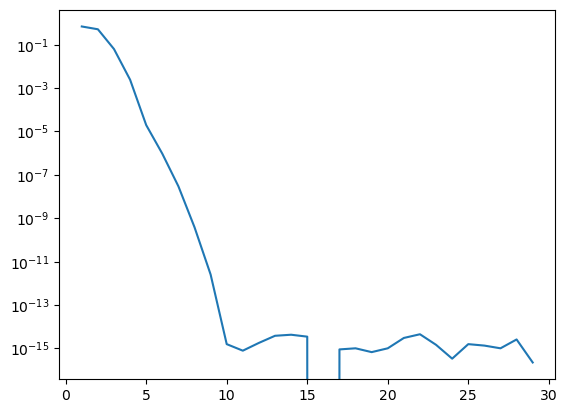

In [49]:
matrix_size = 30
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(n_counts,res)
plt.yscale('log')
print(res[15])

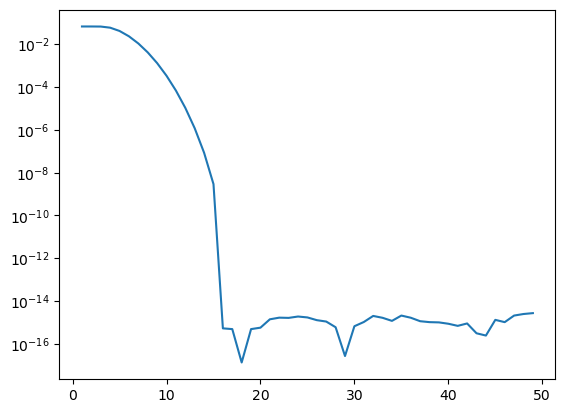

In [50]:
matrix_size=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(n_counts,res)
plt.yscale('log')

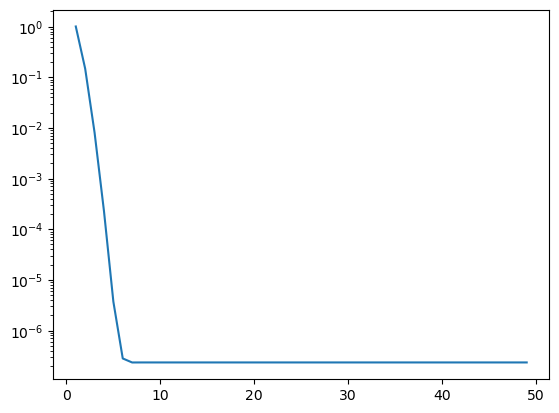

In [51]:
matrix_size=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature_int(f, i, a, b) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

over interval <a,b>

In [52]:
matrix_size=50
f = lambda x: np.sin(x)

#### 2D polynomials:

(100, 120)
(100, 120)


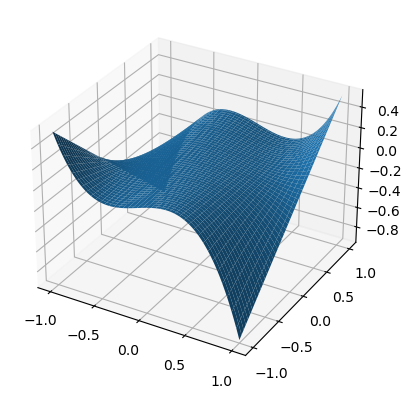

In [53]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kl.integ.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[2])
plt.show()


#### 2D quadrature over interval <a,b>x<c,d>:

In [54]:
nx=500
ny=600
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701

print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d)-fI)

-2.609024107869118e-15


0.07714107601915725


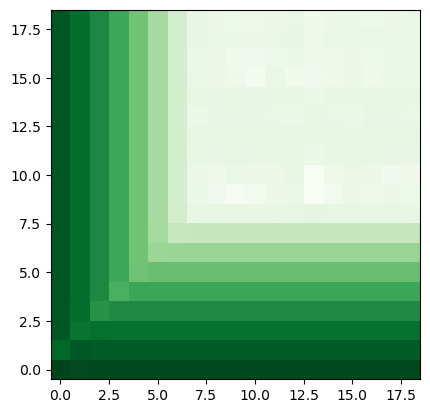

In [55]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kl.integ.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()


test zubaté funkce:

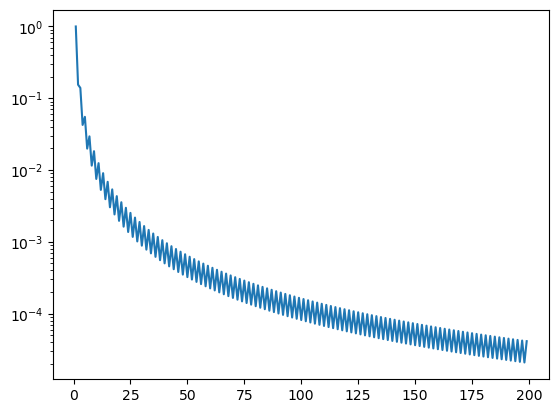

In [56]:
matrix_size=200
f = lambda x: np.abs(x)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
# asdf = 300
# plt.plot(range(asdf+1, matrix_size),res[asdf:])
plt.yscale('log')

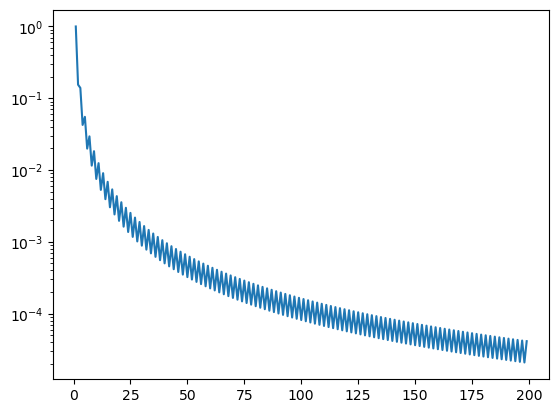

In [57]:
matrix_size=200
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

test nespojité funkce

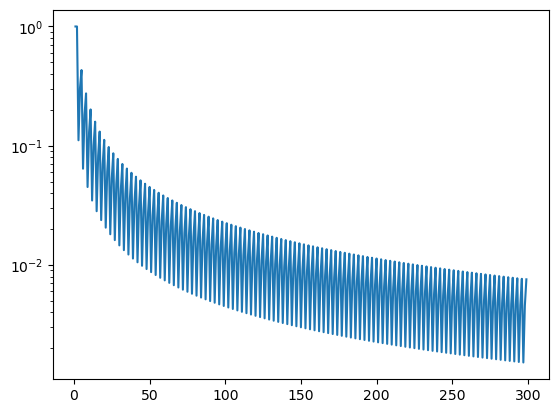

In [58]:
matrix_size=300
f = lambda x: np.sign(x+0.5)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

In [59]:
n = 4
f = lambda x: np.sign(x+0.5)
fI = 1
aprox = []
difference = []
times = []
node_range = range(15,1000)
#node_range = range(1,n+20)
for i in node_range:
    starttime = time.time()
    int_aprox = kl.integ.quadrature(f, i)
    endtime = time.time()

    aprox.append(int_aprox)
    difference.append(np.abs(int_aprox-fI))
    times.append(endtime-starttime)

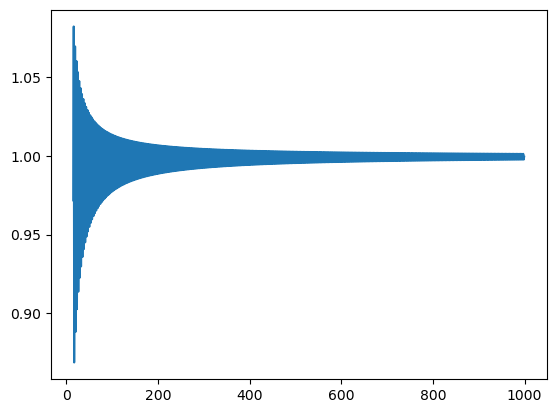

In [60]:
plt.plot(node_range,aprox)
plt.show()

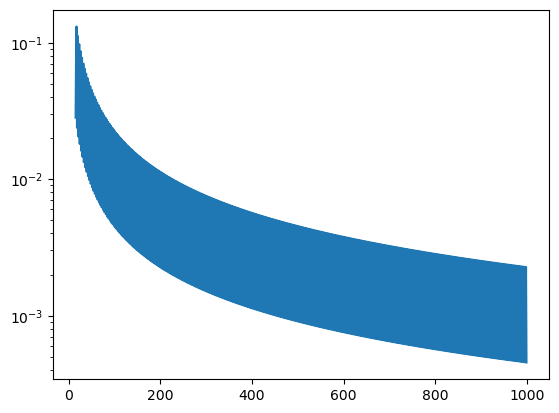

In [61]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

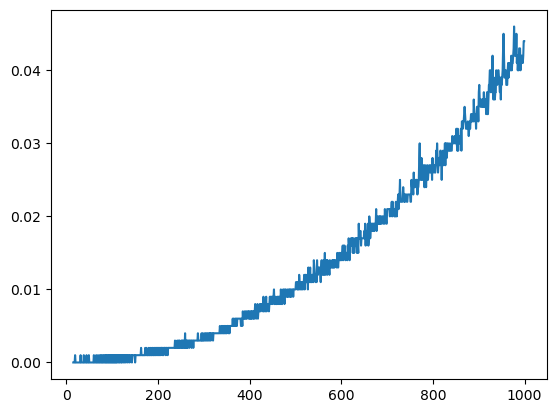

In [62]:
plt.plot(node_range,times)
plt.show()

In [63]:
f = lambda x: np.sign(x+0.5)
fI = 1
times = []
node_range = np.array([100, 200, 500, 750, 1000])
#node_range = range(1,n+20)
for i in node_range:
    starttime = time.time()
    int_aprox = kl.integ.quadrature(f, i)
    endtime = time.time()
    times.append(endtime-starttime)

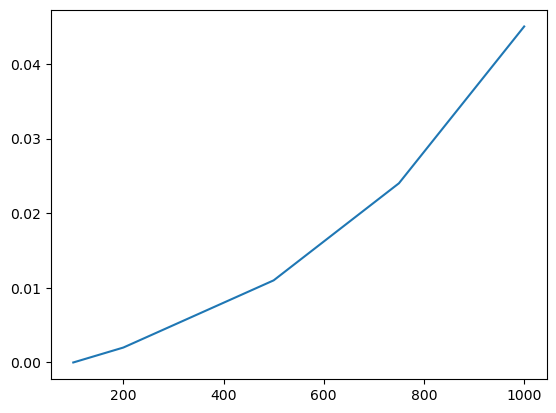

In [64]:
plt.plot(node_range,times)
plt.show()

C:\Users\mikes\AppData\Local\Temp\ipykernel_42412\2717694336.py:3: RuntimeWarning: divide by zero encountered in log
  log_times = np.log(times)


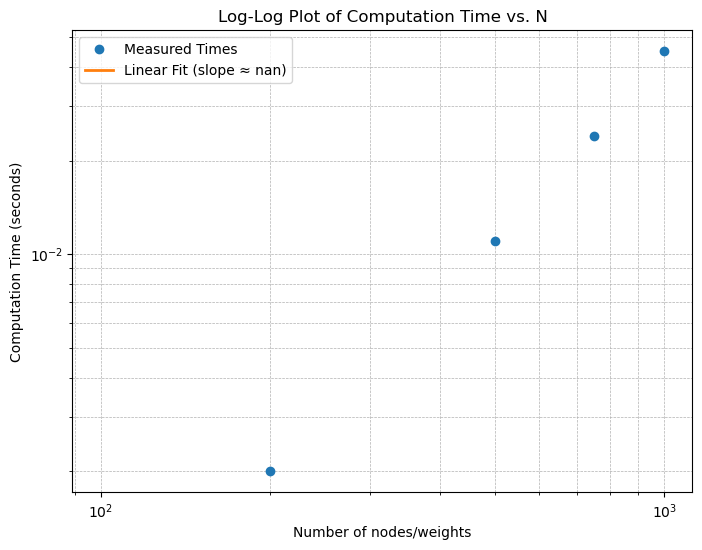

In [65]:
n_values = node_range
log_n = np.log(n_values)
log_times = np.log(times)
coeffs = np.polyfit(log_n, log_times, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_times_fit = slope * log_n + intercept
times_fit = np.exp(log_times_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, times, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, times_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Number of nodes/weights")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


#### Kovergence v log lin grafu

Polynom:

In [66]:
f = lambda x: x**50 + x**4 - 4*x**3 - 15*x + 35
fI = lambda x: (x**51)/51 + (x**5)/5 - x**4 - (15/2)*x**2 + 35*x
real_integ_value = fI(1)-fI(-1)
aprox = []
difference = []
#node_range = np.array([1, 2, 3, 4, 5, 10, 15, 20, 30])
node_range = range(5,25)
for i in node_range:
    int_aprox = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_aprox-real_integ_value))

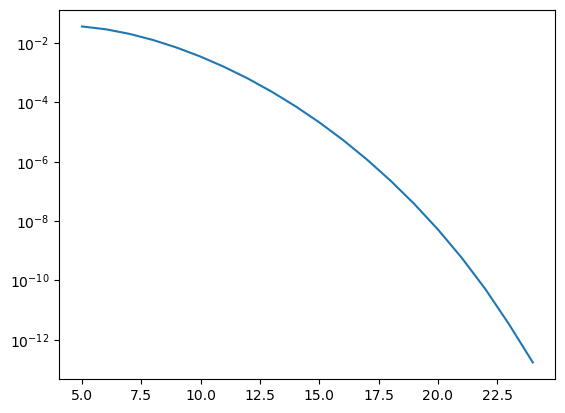

In [67]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

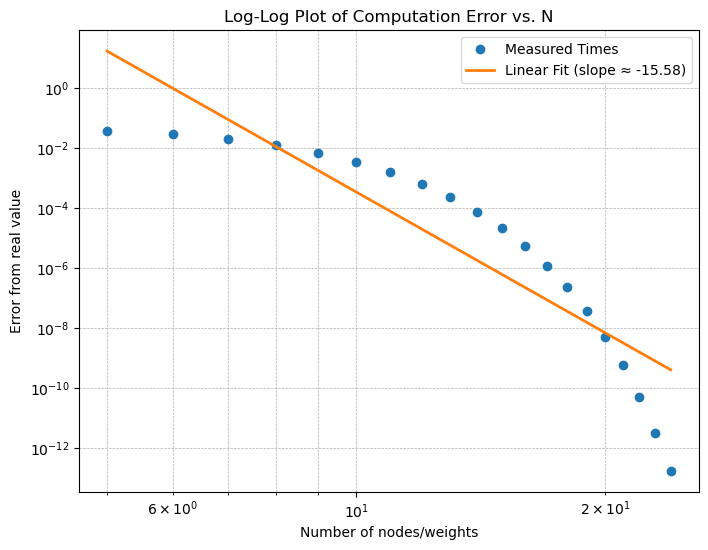

In [68]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Number of nodes/weights")
plt.ylabel("Error from real value")
plt.title("Log-Log Plot of Computation Error vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Hladká funkce:

In [69]:
f = lambda x: np.cos(x**2)
fI = lambda x: (x+52*np.sin(x)+(np.sin(x)-52*x)*np.cos(x))/2
real_integ_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
difference = []
node_range = np.array([1, 2, 3, 4, 5, 7, 10])
#node_range = range(1,20)
for i in node_range:
    int_aprox = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_aprox-real_integ_value))

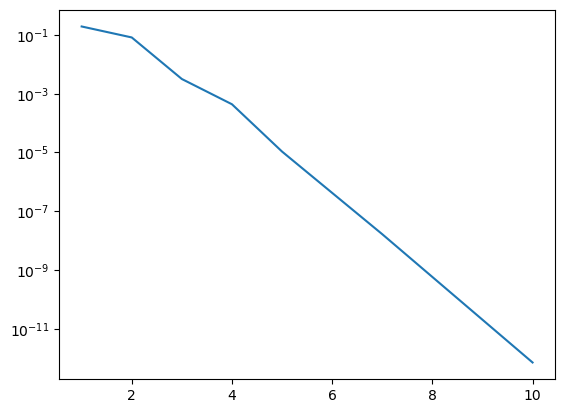

In [70]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

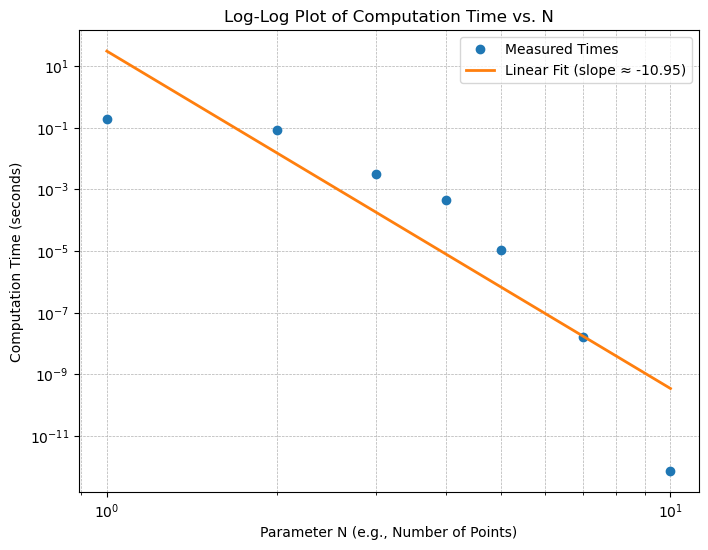

In [71]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Nehladká funkce:

In [72]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1
difference = []
node_range = np.array([2, 4, 10, 20, 50, 100, 200])
for i in node_range:
    difference.append(abs(kl.integ.quadrature(f, i) - real_integ_value))

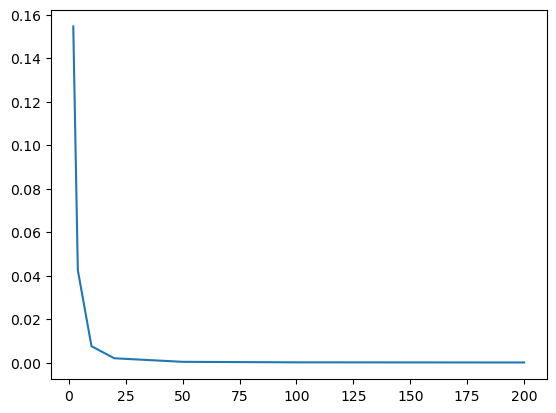

In [73]:
plt.plot(node_range,difference)
plt.show()

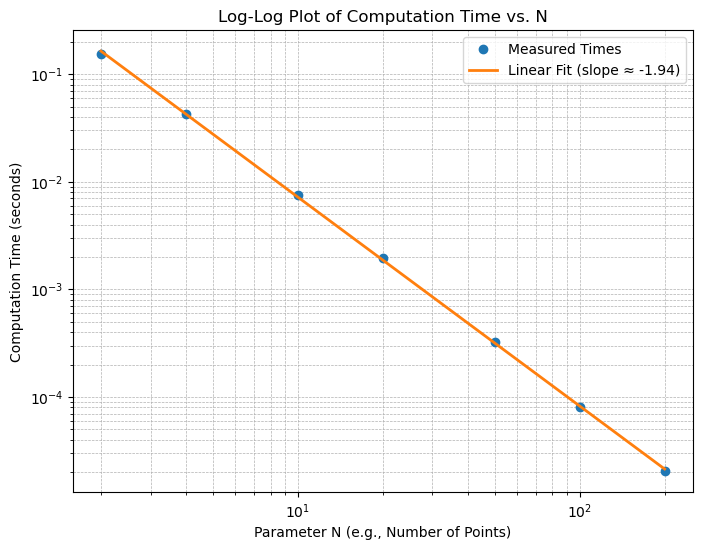

In [74]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Nespojitá funkce:

In [75]:
f = lambda x: np.sign(x+0.5)
real_integ_value = 1
difference = []
node_range = np.array([2, 4, 10, 20, 50, 100, 200])
#node_range = range(1,200)
for i in node_range:
    int_aprox = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_aprox-real_integ_value))

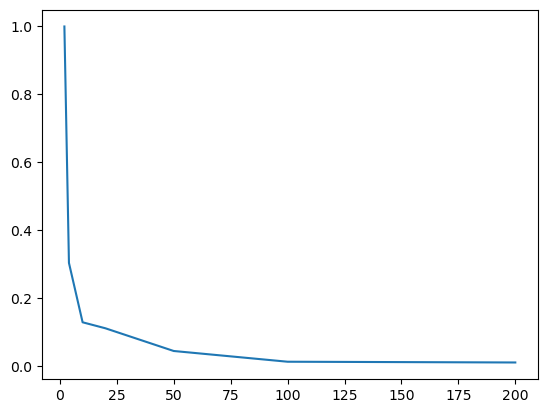

In [76]:
plt.plot(node_range,difference)
plt.show()

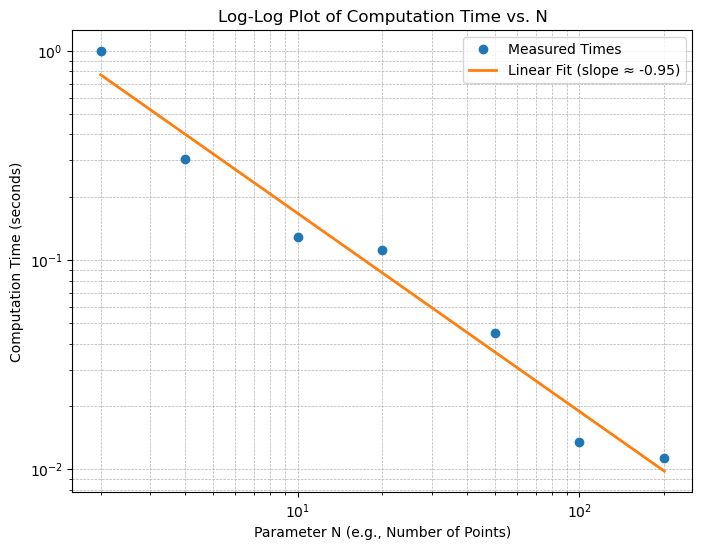

In [77]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

### 2D integrals

In [81]:
nx=50
ny=100
f = lambda x,y: x**2 * np.sin(y+5)
real_integ_value = 4/3 * np.sin(1)*np.sin(5)
Gq = kl.integ.quadrature_2d(f,nx,ny)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.0758759383426544
actual value of integral: -1.075875938342652
error: 2.4424906541753444e-15


over <a,b>x<c,d>:

In [82]:
nx=50
ny=60
a = 5
b = 10
c = 10
d = 13
f = lambda x,y: np.sin(x+y)/np.log(5*y)
real_integ_value = 0.07714107601915701
Gq = kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.07714107601915583
actual value of integral: 0.07714107601915701
error: 1.1796119636642288e-15


0.07714107601915725


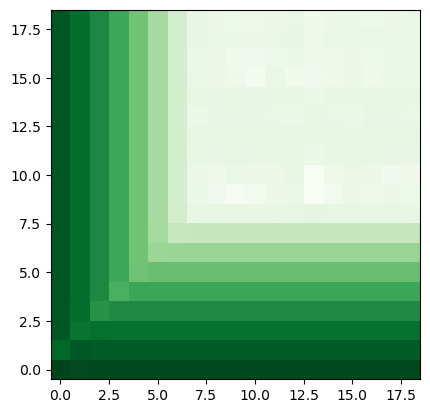

In [89]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kl.integ.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()
